In [1]:
import pandas as pd
import numpy as np
import html5lib
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

link = "https://en.wikipedia.org/wiki/Kontinental_Hockey_League"

tables = pd.read_html(link)

In [2]:
teams = tables[1]

In [3]:
teams_header = teams.T.reset_index().T.iloc[0]
teams = teams.T.reset_index(drop=True).T
teams.columns = teams_header
teams = teams.drop(12,  axis=0)

In [4]:
teams.Capacity = teams.Capacity.apply(lambda x: int(x))
teams = teams.sort_values(by='Capacity', ascending = False)
a = teams.Division == 'Bobrov'
b = teams.Division == 'Tarasov'
teams['Conference'] = a|b
teams = teams.replace(True, "Western").replace(False, 'Eastern')

In [5]:
teams.head()

level_0,Division,Team,City,Arena,Capacity,Founded,Joined,Head Coach,Captain,Conference
7,Tarasov,Dinamo Minsk,Minsk,Minsk-Arena,15000,2004,2008,Alexander Andrievsky,Sergei Kostitsyn,Western
24,Chernyshev,Red Star Kunlun,Beijing,Cadillac Arena,14000,2016,2016,Curt Fraser,Mathew Maione,Eastern
2,Bobrov,Jokerit Helsinki,Helsinki,Hartwall Arena,13349,1967,2014,Lauri Marjamäki,Peter Regin,Western
1,Bobrov,Dynamo Moscow,Moscow,VTB Arena,12724,1946,2008,Vladimir Krikunov,Ilya Nikulin,Western
4,Bobrov,SKA Saint Petersburg,Saint Petersburg,Ice Palace Saint Petersburg,12300,1946,2008,Ilya Vorobyov,Pavel Datsyuk,Western


In [6]:
df_1 = teams.groupby('Joined')['Team'].count().reset_index().rename(columns = {'Joined' : 'year', 'Team':'Joined'})
df_2 = teams.groupby('Founded')['Team'].count().reset_index().rename(columns = {'Founded' : 'year', 'Team':'Founded'})

In [7]:
df_year = pd.merge(df_1, df_2, on = 'year', how = 'outer').fillna(0).sort_values(by='year').replace("1998*", "1998")
df_year.Joined = df_year.Joined.apply(lambda x: int(x))
df_year.Founded = df_year.Founded.apply(lambda x: int(x))

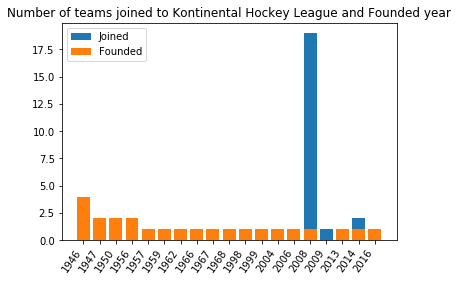

In [8]:
fig, ax = plt.subplots()
plt.bar(df_year.year, df_year.Joined, label = 'Joined')
plt.bar(df_year.year, df_year.Founded, label = 'Founded')
ax.set_xticklabels(df_year.year, rotation=55, horizontalalignment='right')
ax.legend()
ax.set_title('Number of teams joined to Kontinental Hockey League and Founded year')
plt.show()

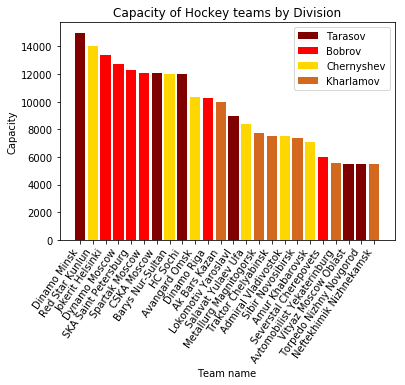

In [10]:
fig, ax = plt.subplots()
x = np.arange(teams.shape[0])
Tarasov = teams.Division == 'Tarasov'
Bobrov = teams.Division == 'Bobrov'
Chernyshev = teams.Division == 'Chernyshev'
Kharlamov = teams.Division == 'Kharlamov'
plt.bar(x[Tarasov], teams.Capacity[Tarasov], color = 'maroon', label = 'Tarasov')
plt.bar(x[Bobrov], teams.Capacity[Bobrov], color = 'red', label = 'Bobrov')
plt.bar(x[Chernyshev], teams.Capacity[Chernyshev], color = 'gold', label = 'Chernyshev')
plt.bar(x[Kharlamov], teams.Capacity[Kharlamov], color = 'chocolate', label = 'Kharlamov')
ax.set_xticklabels(teams.Team, rotation=55, horizontalalignment='right')
ax.legend()
ax.set_title('Capacity of Hockey teams by Division')
plt.ylabel('Capacity')
plt.xlabel('Team name')
plt.xticks(x)
plt.show()

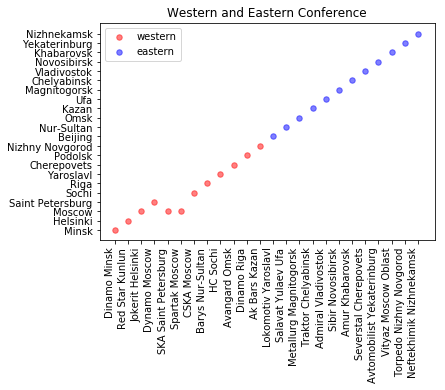

In [11]:
fig, ax = plt.subplots()
plt.scatter(teams.Team[teams.Conference == 'Western'], teams.City[teams.Conference == 'Western'], s=30,  alpha=0.5, label = 'western', color = 'red')
plt.scatter(teams.Team[teams.Conference == 'Eastern'], teams.City[teams.Conference == 'Eastern'], s=30,  alpha=0.5, label = 'eastern', color = 'blue')
ax.set_xticklabels(teams.Team, rotation=90, horizontalalignment='right')
ax.legend()
ax.set_title('Western and Eastern Conference')
plt.show()